In [52]:
#Decision tree using python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [53]:
#Load the dataset
movies_data = pd.read_csv('/Users/himangini/Desktop/CMPE-257/Assignment1/movie_metadata.csv')
movies_data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [54]:
movies_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [55]:
movies_data = movies_data.drop(columns=['color', 'director_name', 'num_critic_for_reviews','director_facebook_likes', 
                                        'actor_3_facebook_likes', 'actor_2_name','actor_1_facebook_likes', 'gross', 
                                        'actor_1_name','movie_title', 'num_voted_users', 'cast_total_facebook_likes',
                                        'actor_3_name', 'facenumber_in_poster', 'plot_keywords','movie_imdb_link', 
                                        'num_user_for_reviews', 'language', 'country','budget', 'title_year', 
                                        'actor_2_facebook_likes','aspect_ratio', 'movie_facebook_likes'])
movies_data.head(5)

,duration,genres,content_rating,imdb_score
0,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,7.9
1,169.0,Action|Adventure|Fantasy,PG-13,7.1
2,148.0,Action|Adventure|Thriller,PG-13,6.8
3,164.0,Action|Thriller,PG-13,8.5
4,NaN,Documentary,NaN,7.1


In [56]:
#Cleaning the dataset
movies_data = movies_data.dropna()
#Data Preprocessing
movies_data2 = movies_data.join(movies_data['genres'].str.get_dummies())
movies_data2.head()
movies_data2 = movies_data2.drop(columns=['genres'])
movies_data2.head()
movies_data2.columns

Index(['duration', 'content_rating', 'imdb_score', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [57]:
training_fields = ['duration', 'content_rating', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']

In [58]:
movies_data2.dtypes

duration          float64
content_rating     object
imdb_score        float64
Action              int64
Adventure           int64
Animation           int64
Biography           int64
Comedy              int64
Crime               int64
Documentary         int64
Drama               int64
Family              int64
Fantasy             int64
Film-Noir           int64
History             int64
Horror              int64
Music               int64
Musical             int64
Mystery             int64
News                int64
Reality-TV          int64
Romance             int64
Sci-Fi              int64
Sport               int64
Thriller            int64
War                 int64
Western             int64
dtype: object

In [59]:
movies_data2.content_rating.unique()
movies_data2.imdb_score.unique()

array([7.9, 7.1, 6.8, 8.5, 6.6, 6.2, 7.8, 7.5, 6.9, 6.1, 6.7, 7.3, 6.5,
       7.2, 8.1, 7. , 7.7, 8.2, 5.9, 6. , 5.7, 6.4, 6.3, 5.6, 8.3, 8. ,
       8.4, 5.8, 5.4, 9. , 4.8, 5.2, 7.6, 4.5, 5.5, 8.6, 8.8, 5.1, 7.4,
       4.2, 5. , 4.9, 3.7, 5.3, 4.3, 3.8, 4.4, 3.3, 2.2, 8.9, 8.7, 4.6,
       2.4, 3.4, 4.1, 4.7, 3. , 3.6, 3.5, 2.7, 1.7, 4. , 2. , 9.3, 2.9,
       3.9, 2.8, 2.3, 1.9, 3.1, 9.1, 1.6, 2.5, 2.1, 3.2, 9.2, 2.6])

In [60]:
def rating(imdb_score):
    if imdb_score>=1 and imdb_score<3:
        imdb_score=1
    elif imdb_score>=3 and imdb_score<5:
        imdb_score=2
    elif imdb_score>=5 and imdb_score<7:
        imdb_score=3
    elif imdb_score>=7 and imdb_score<9:
        imdb_score=4
    else:
        imdb_score=5
    return imdb_score

In [61]:
print(rating(3.4))

2


In [62]:
#Formatting text data for content_rating
boolean_map = {'PG-13': 1, 'R': 0}
movies_data2.content_rating = movies_data2.content_rating.replace(boolean_map)
movies_data2 = movies_data2.drop(columns=['content_rating'])
movies_data2.head()

,duration,imdb_score,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,178.0,7.9,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,169.0,7.1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,148.0,6.8,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,164.0,8.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,132.0,6.6,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
movies_data2['imdb_score'] = movies_data2['imdb_score'].apply(rating)
movies_data2.imdb_score.unique()

array([4, 3, 5, 2, 1])

In [64]:
features = movies_data2.loc[:, movies_data2.columns != 'imdb_score']
target = movies_data2.loc[:, ['imdb_score']]

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Split data into testing and training sets
from sklearn.cross_validation import train_test_split

# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3552, 25)
(3552, 1)
(1185, 25)
(1185, 1)


In [66]:
#Decision Tree Classifier with gini index

from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(max_depth = 15)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
# import the accuracy metrics 
from sklearn.metrics import accuracy_score 
y_pred = clf.predict(X_test)

# Accuracy = TP+TN/TP+FP+FN+TN
print(accuracy_score(y_test,y_pred))

0.5983122362869199


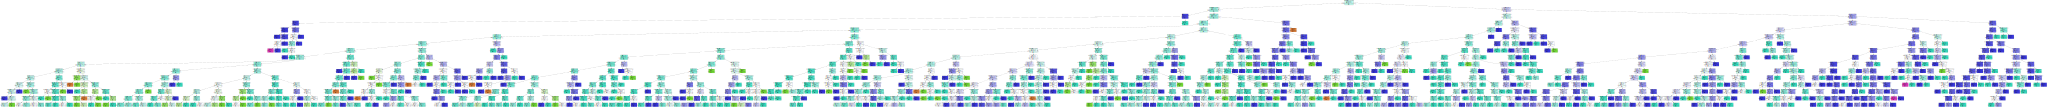

In [86]:
#Visualization of the tree 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display, HTML

# class labels
labels = training_fields[1:]

graph = Source(tree.export_graphviz(clf,out_file=None,feature_names=labels,class_names=['5','1','2','3','4'],filled=True))
display(SVG(graph.pipe(format='svg')))

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=6, n_informative=5, n_redundant=0, random_state=0, shuffle=False)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y)
clf=RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=0)
clf.fit(X_train_r,y_train_r)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [135]:
y_pred_r=clf.predict(X_test_r)

In [137]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_r, y_pred_r))

Accuracy: 0.94


In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.columns

Index(['principal component 1', 'principal component 2'], dtype='object')

In [138]:
features2 = principalDf
target2 = movies_data2.loc[:, ['imdb_score']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2)
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(max_depth = 15)
clf.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [139]:
from sklearn.metrics import accuracy_score 
y_pred2 = clf.predict(X_test2)

# Accuracy = TP+TN/TP+FP+FN+TN
print(accuracy_score(y_test2,y_pred2))

0.5434599156118144


In [140]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train2, y_train2)
gnb_predictions = gnb.predict(X_test2)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
np.unique(gnb_predictions)

array([3, 4, 5])

In [142]:
accuracy = gnb.score(X_train2, y_train2)
print(accuracy)

0.5999436936936937
